In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [67]:
param = CharmmParameterSet('../data/charmm_ff/top_all36_cgenff.rtf', '../data/charmm_ff/par_all36_cgenff.prm')
structure = 'butane.psf'
scan = 'butane_scan_b3lyp_4.log'

In [5]:
butane_scan = ScanSet.parse_psi4(scan, structure)
butane_scan.compute_energy(param)

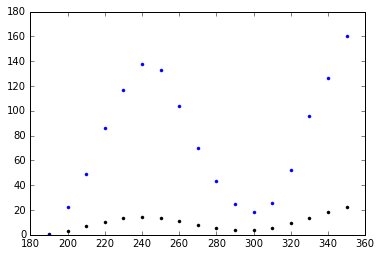

In [6]:
plt.plot(butane_scan.steps, butane_scan.qm_energy, 'k.')
plt.plot(butane_scan.steps, butane_scan.mm_energy, '.')

In [7]:
platform = mm.Platform.getPlatformByName('Reference')

In [8]:
model = Model.TorsionFitModelEliminatePhase(param, butane_scan, platform=platform, 
                                            param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')])

In [9]:
sampler = MCMC(model.pymc_parameters, db=sqlite_plus, dbname='butane.database', verbose=5)

In [10]:
sampler.sample(10000)

Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_4_K
Assigning step method Metropolis to stochastic log_sigma
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_multiplicity_bitstring
Assigning step method Metropolis to stochastic BUTA1_offset
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_2_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_6_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_3_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_1_K
 [-----------------100%-----------------] 10000 of 10000 complete in 277.1 sec

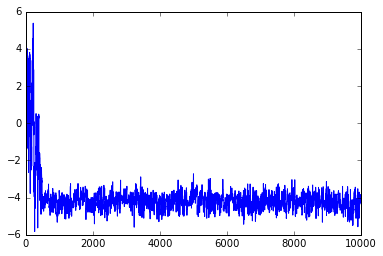

In [16]:
plt.plot(sampler.trace('CG331_CG321_CG321_CG331_1_K')[:])

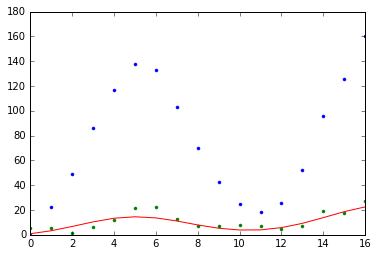

In [18]:
plt.plot(sampler.trace('mm_energy')[0], '.')
plt.plot(butane_scan.mm_energy, '.')
plt.plot(butane_scan.qm_energy)

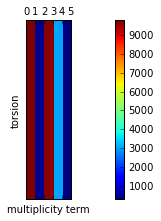

In [22]:
plots.marg_mult(model, sampler, 10000, 0, 'multiplicity.png')

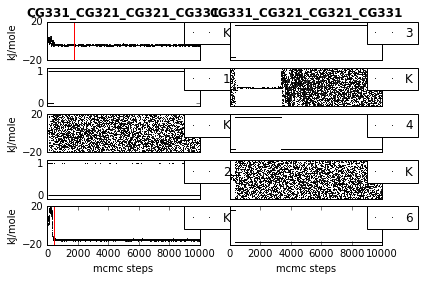

In [23]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=1.0)

In [24]:
model_2 = Model.TorsionFitModelEliminatePhase(param, butane_scan, platform=platform, decouple_n=True,
                                            param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')])

In [41]:
sampler_2 = MCMC(model_2.pymc_parameters, db=sqlite_plus, dbname='butane_2.database', verbose=5)

In [42]:
sampler_2.sample(10000)

Assigning step method Metropolis to stochastic BUTA1_offset
Assigning step method Metropolis to stochastic log_sigma
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_2_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_4_K
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_multiplicity_bitstring
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_6_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_3_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_1_K
 [-----------------100%-----------------] 10000 of 10000 complete in 326.0 sec

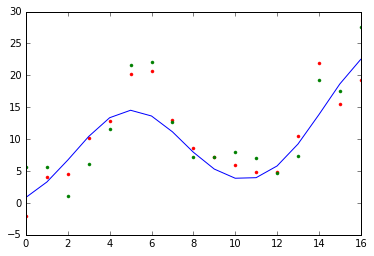

In [56]:
plt.plot(sampler_2.trace('mm_energy')[-1], 'r.')
plt.plot(sampler.trace('mm_energy')[-1], 'g.')
#plt.plot(butane_scan.mm_energy, 'b.')
plt.plot(butane_scan.qm_energy)

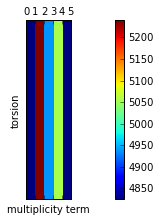

In [44]:
plots.marg_mult(model_2, sampler_2, 10000, 0, 'multiplicity.png')

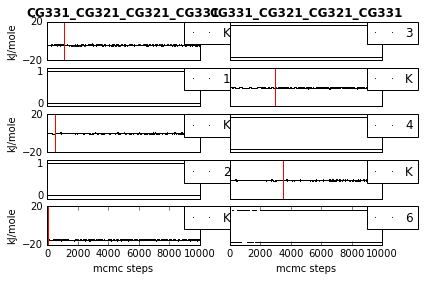

In [45]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler_2, markersize=1.0)

(array([  8.66000000e+02,   8.18300000e+03,   6.00000000e+02,
          1.03000000e+02,   7.30000000e+01,   6.30000000e+01,
          3.60000000e+01,   4.40000000e+01,   2.90000000e+01,
          3.00000000e+00]),
 array([-5.826146, -4.705818, -3.58549 , -2.465162, -1.344834, -0.224506,
         0.895822,  2.01615 ,  3.136478,  4.256806,  5.377134]),
 <a list of 10 Patch objects>)

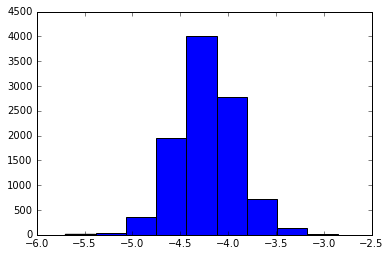

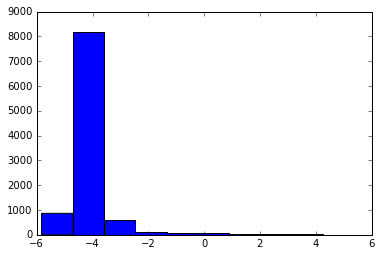

In [59]:
plt.hist(sampler_2.trace('CG331_CG321_CG321_CG331_1_K')[:])
plt.figure(2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[:])

(array([  903.,   959.,  1024.,  1047.,  1050.,  1340.,   886.,  1001.,
          908.,   882.]),
 array([ -1.99955420e+01,  -1.59975293e+01,  -1.19995166e+01,
         -8.00150390e+00,  -4.00349120e+00,  -5.47850000e-03,
          3.99253420e+00,   7.99054690e+00,   1.19885596e+01,
          1.59865723e+01,   1.99845850e+01]),
 <a list of 10 Patch objects>)

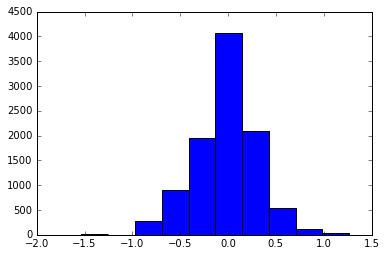

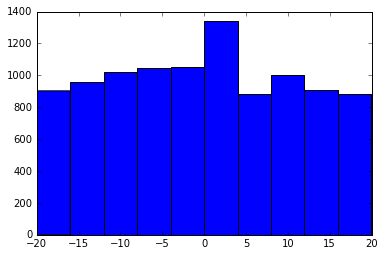

In [60]:
plt.hist(sampler_2.trace('CG331_CG321_CG321_CG331_2_K')[:])
plt.figure(2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_2_K')[:])

(array([  9.64300000e+03,   2.70000000e+01,   7.00000000e+00,
          6.00000000e+00,   1.00000000e+01,   2.90000000e+01,
          7.60000000e+01,   3.30000000e+01,   9.70000000e+01,
          7.20000000e+01]),
 array([-16.558515 , -12.9168246,  -9.2751342,  -5.6334438,  -1.9917534,
          1.649937 ,   5.2916274,   8.9333178,  12.5750082,  16.2166986,
         19.858389 ]),
 <a list of 10 Patch objects>)

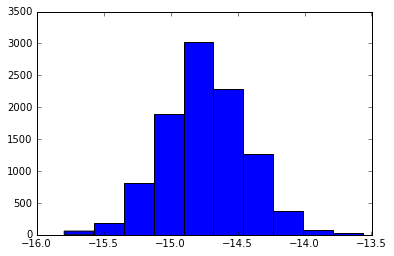

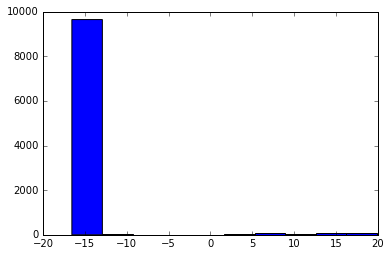

In [61]:
plt.hist(sampler_2.trace('CG331_CG321_CG321_CG331_3_K')[:])
plt.figure(2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_3_K')[:])

(array([  706.,   689.,   709.,   657.,  3458.,   832.,   732.,   736.,
          741.,   740.]),
 array([ -1.99930620e+01,  -1.59945816e+01,  -1.19961012e+01,
         -7.99762080e+00,  -3.99914040e+00,  -6.60000000e-04,
          3.99782040e+00,   7.99630080e+00,   1.19947812e+01,
          1.59932616e+01,   1.99917420e+01]),
 <a list of 10 Patch objects>)

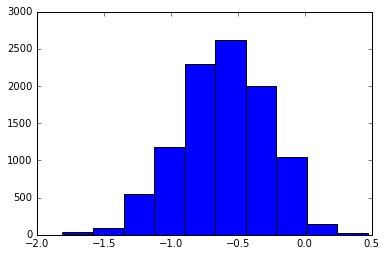

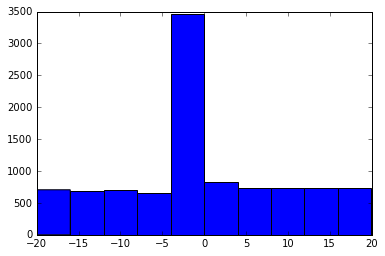

In [62]:
plt.hist(sampler_2.trace('CG331_CG321_CG321_CG331_4_K')[:])
plt.figure(2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_4_K')[:])

(array([ 1002.,  1010.,   966.,   970.,  1075.,  1135.,   994.,   963.,
          918.,   967.]),
 array([ -1.99875760e+01,  -1.59891395e+01,  -1.19907030e+01,
         -7.99226650e+00,  -3.99383000e+00,   4.60650000e-03,
          4.00304300e+00,   8.00147950e+00,   1.19999160e+01,
          1.59983525e+01,   1.99967890e+01]),
 <a list of 10 Patch objects>)

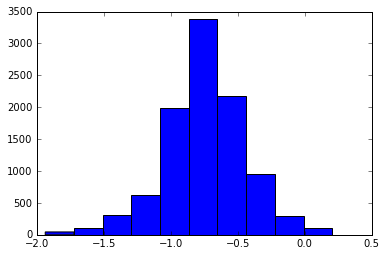

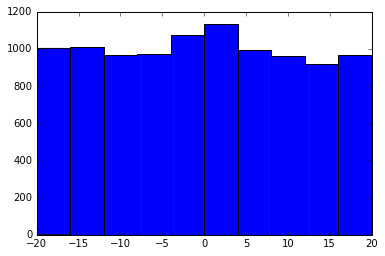

In [63]:
plt.hist(sampler_2.trace('CG331_CG321_CG321_CG331_6_K')[:])
plt.figure(2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_6_K')[:])

In [76]:
model = Model.TorsionFitModel(param, None, butane_scan, platform=platform, 
                                            param_to_opt=[('CG331', 'CG321', 'CG321', 'CG331')])

In [79]:
sampler = MCMC(model.pymc_parameters, db=sqlite_plus, dbname='butane_3.database', verbose=5)

In [80]:
model.pymc_parameters

{'BUTA1_offset': <pymc.distributions.Uniform 'BUTA1_offset' at 0x186a9c510>,
 'CG331_CG321_CG321_CG331_1_K': <pymc.distributions.Uniform 'CG331_CG321_CG321_CG331_1_K' at 0x186a92610>,
 'CG331_CG321_CG321_CG331_1_Phase': <pymc.distributions.DiscreteUniform 'CG331_CG321_CG321_CG331_1_Phase' at 0x186a92fd0>,
 'CG331_CG321_CG321_CG331_2_K': <pymc.distributions.Uniform 'CG331_CG321_CG321_CG331_2_K' at 0x186a92c10>,
 'CG331_CG321_CG321_CG331_2_Phase': <pymc.distributions.DiscreteUniform 'CG331_CG321_CG321_CG331_2_Phase' at 0x186a92a50>,
 'CG331_CG321_CG321_CG331_3_K': <pymc.distributions.Uniform 'CG331_CG321_CG321_CG331_3_K' at 0x186a92910>,
 'CG331_CG321_CG321_CG331_3_Phase': <pymc.distributions.DiscreteUniform 'CG331_CG321_CG321_CG331_3_Phase' at 0x1869b5490>,
 'CG331_CG321_CG321_CG331_4_K': <pymc.distributions.Uniform 'CG331_CG321_CG321_CG331_4_K' at 0x186a928d0>,
 'CG331_CG321_CG321_CG331_4_Phase': <pymc.distributions.DiscreteUniform 'CG331_CG321_CG321_CG331_4_Phase' at 0x1869b59d0>,
 'C

In [81]:
sampler.sample(10000)

Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_6_K
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_2_Phase
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_1_K
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_3_Phase
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_4_K
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_1_Phase
Assigning step method Metropolis to stochastic BUTA1_offset
Assigning step method Metropolis to stochastic log_sigma
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_multiplicity_bitstring
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_3_K
Assigning step method Metropolis to stochastic CG331_CG321_CG321_CG331_2_K
Assigning step method DiscreteMetropolis to stochastic CG331_CG321_CG321_CG331_4_Phase
Assigning step method DiscreteMetropolis to stochastic CG3

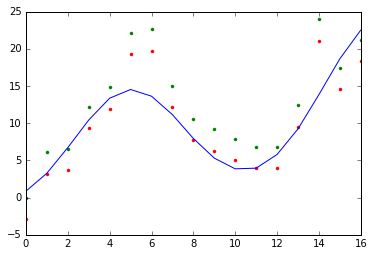

In [82]:
plt.plot(sampler.trace('mm_energy')[-1], 'r.')
plt.plot(sampler.trace('mm_energy')[0], 'g.')
#plt.plot(butane_scan.mm_energy, 'b.')
plt.plot(butane_scan.qm_energy)

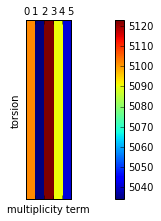

In [83]:
plots.marg_mult(model, sampler, 10000, 0, 'multiplicity.png')

In [ ]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=1.0)